In [1]:
%load_ext autoreload
%autoreload 2

import torch
import pyro
from pyro import distributions as dist
from pyro import poutine
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from model import YModel, OptLoss

import math
import matplotlib.pyplot as plt
%matplotlib inline

my_cmap = plt.cm.jet
my_cmap.set_under('white')

device = torch.device("cuda", 0)

In [6]:
from model import GaussianMixtureHumpModel, YModel, RosenbrockModel

In [7]:
y_sampler = GaussianMixtureHumpModel(device, psi_init=torch.Tensor([0,0]))#, x_range=((-10, -10), (10, 10)))
y_sampler = RosenbrockModel(device, psi_init=torch.Tensor([0,0]))

In [33]:
step = 3
current_psi = torch.Tensor([1,1])
average_size=3000
psi_size=5000

In [34]:
#psi_range = (current_psi - step, current_psi + step)        
step = 1
psi_range = (current_psi - step , current_psi + step)

psi_grid = dist.Uniform(*psi_range).sample([psi_size]).to(device)
#x = y_sampler.x_dist.sample([average_size * psi_size, 1]).to(device)
#         psi_range = torch.tensor(lhs(len(current_psi), psi_size)).float().to(device)
#         scale = 1 if plot_in else scale_step
#         psi_grid = scale * train_step * (psi_range * 2 - 1) + current_psi.view(1, -1)        
x = y_sampler.sample_x(average_size * psi_size).to(device)

psi = psi_grid.repeat(1, average_size).view(-1, len(psi_range[0]))
psi.requires_grad = False
y_sampler.make_condition_sample({"mu": psi, "x": x})


data_gen = y_sampler.condition_sample(1)
loss = y_sampler.loss(data_gen).view(-1, average_size).mean(dim=1)

In [8]:
# def grammy(y):
#     return torch.sin(10 * math.pi * y) / (2 * y) + (y - 1) ** 4

# def adijman(y):
#     return torch.cos(y[:, 0]) * torch.sin(y[:, 1]) - y[:,0] /  (y[:,1] ** 2 + 1)

# def three_hump(y):
#     return 2 * y[:, 0] ** 2 - 1.05 * y[:, 0] ** 4 + y[:, 0] ** 6 / 6 + y[:,0] * y[:,1] + y[:, 1] ** 2

In [68]:
# splace = torch.linspace(-1, 3.5, 1000)
# plt.plot(splace.numpy(), grammy(splace).numpy())

# y = dist.Uniform(-2.5,2.5).sample([5000, 2])
# plt.scatter(y[:,0], y[:,1], c=three_hump(y), cmap=my_cmap)
# plt.colorbar()

In [12]:
from matplotlib import colors

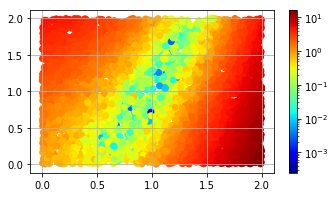

In [35]:
plt.figure(figsize=(12,3))
#psi_norm = 1 / 30 * psi_grid.norm(dim=1).detach().cpu()
plt.subplot(1,2,1)
plt.scatter(psi_grid[:,0].detach().cpu(),
            psi_grid[:,1].detach().cpu(),
            c=data_gen[:,0].view(-1, average_size).mean(dim=1).detach().cpu(), cmap=my_cmap, 
            norm=colors.LogNorm())
plt.colorbar()
plt.grid()
# plt.subplot(1,2,2)
# plt.scatter(psi_grid[:,0].detach().cpu(),
#             psi_grid[:,1].detach().cpu(),
#             c=data_gen[:,1].view(-1, average_size).mean(dim=1).detach().cpu(), cmap=my_cmap)
# plt.colorbar()

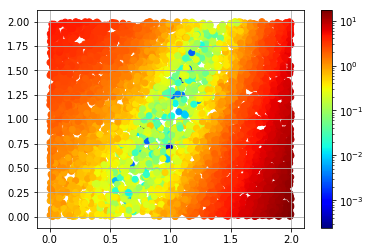

In [36]:
# psi_norm = 1 / 30 * psi_grid.norm(dim=1).detach().cpu()
mask = (torch.abs(psi_grid - 1) < 1).all(dim=1)
psi_grid = psi_grid[mask]
loss = loss[mask]
plt.scatter(psi_grid[:,0].detach().cpu(),
            psi_grid[:,1].detach().cpu(),
            c=loss.detach().cpu(), cmap=my_cmap,
           norm=colors.LogNorm())
plt.colorbar()
plt.grid()

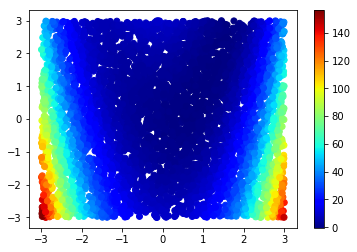

In [62]:
plt.scatter(psi_grid[:,0].detach().cpu(), psi_grid[:,1].detach().cpu(), c=loss.detach().cpu(), cmap=my_cmap)
plt.colorbar()

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

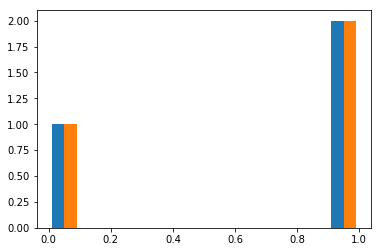

In [91]:
plt.hist(pyro.distributions.RelaxedBernoulli(torch.Tensor([0.0001]),
                                             probs = torch.Tensor([1,1,0.001])).sample([2]))

In [73]:
from model import GaussianMixtureHumpModel, YModel

In [51]:
y_sampler = YModel(device, psi_init=torch.Tensor([0,0]),
                  x_range=(0, 5))

In [52]:
step = 1
current_psi = torch.Tensor([0,0])
average_size=3000
psi_size=5000

In [61]:
#psi_range = (current_psi - step, current_psi + step)        
psi_range = (current_psi - step , current_psi + step)

psi_grid = dist.Uniform(*psi_range).sample([psi_size]).to(device)
#x = y_sampler.x_dist.sample([average_size * psi_size, 1]).to(device)
#         psi_range = torch.tensor(lhs(len(current_psi), psi_size)).float().to(device)
#         scale = 1 if plot_in else scale_step
#         psi_grid = scale * train_step * (psi_range * 2 - 1) + current_psi.view(1, -1)        
x = y_sampler.sample_x(average_size * psi_size).to(device)

psi = psi_grid.repeat(1, average_size).view(-1, len(psi_range[0]))
psi.requires_grad = False
y_sampler.make_condition_sample({"mu": psi, "x": x})


data_gen = y_sampler.condition_sample(1)
loss = y_sampler.loss(data_gen).view(-1, average_size).mean(dim=1)

In [54]:
#plt.hist(pyro.distributions.Normal(x[:1000], 1).sample().cpu().numpy())

In [62]:
import matplotlib

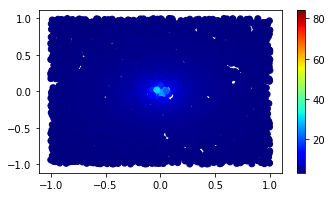

In [63]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(psi_grid[:,0].detach().cpu(),
            psi_grid[:,1].detach().cpu(),
            c=data_gen[:,0].view(-1, average_size).mean(dim=1).detach().cpu(), cmap=my_cmap,)
            #norm=matplotlib.colors.LogNorm())
plt.colorbar()

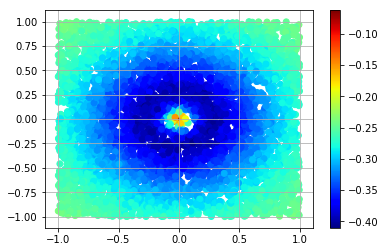

In [64]:
plt.scatter(psi_grid[:,0].detach().cpu(),
            psi_grid[:,1].detach().cpu(),
            c=loss.detach().cpu(), cmap=my_cmap)
plt.colorbar()
plt.grid()